<a href="https://colab.research.google.com/github/AmericaMtz22/AmericaMtz-AI_2024_IB/blob/main/P3_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Imagen2.jpg to Imagen2 (3).jpg
Saving imagen1.jpg to imagen1 (2).jpg


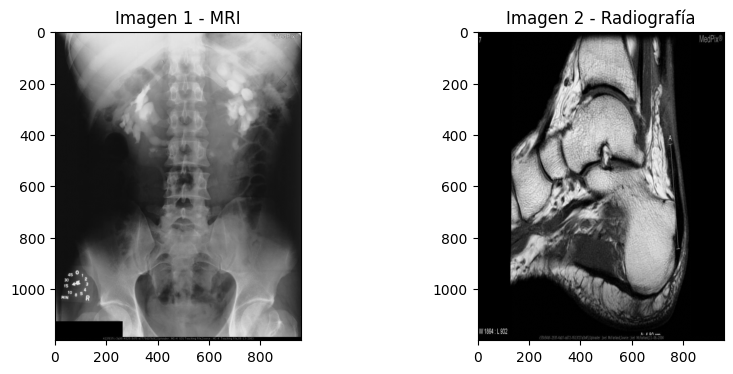

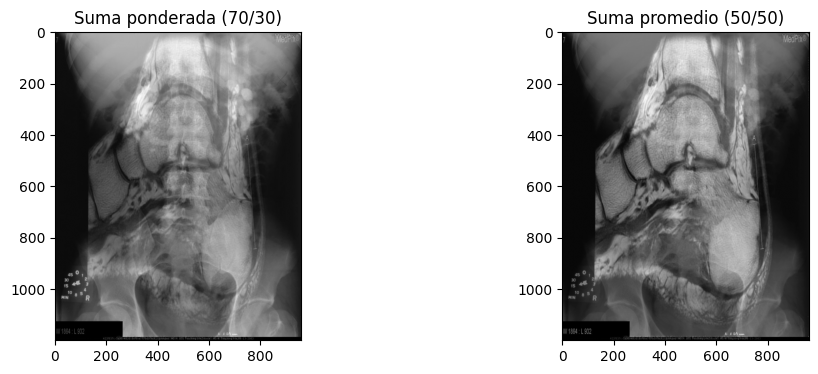

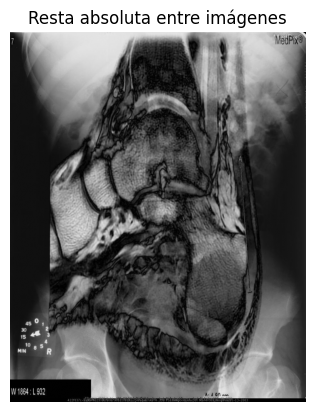

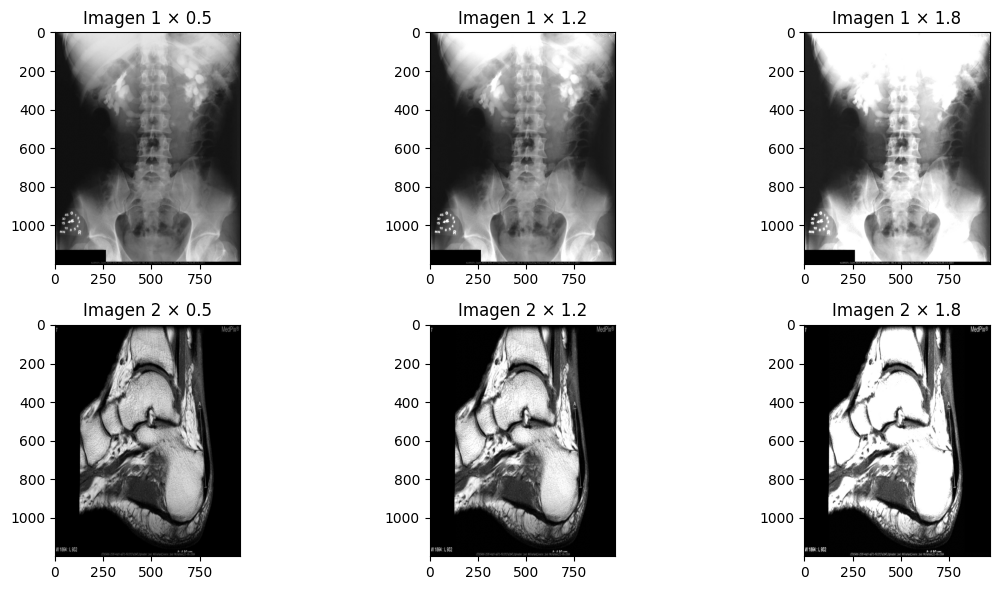

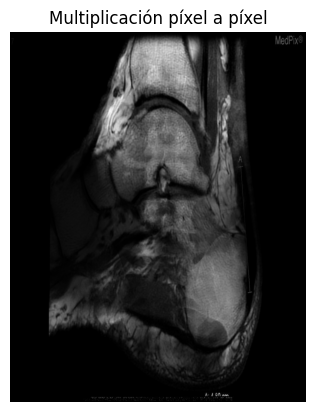

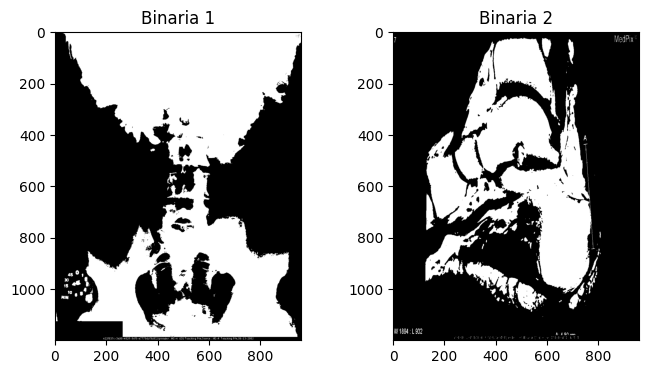

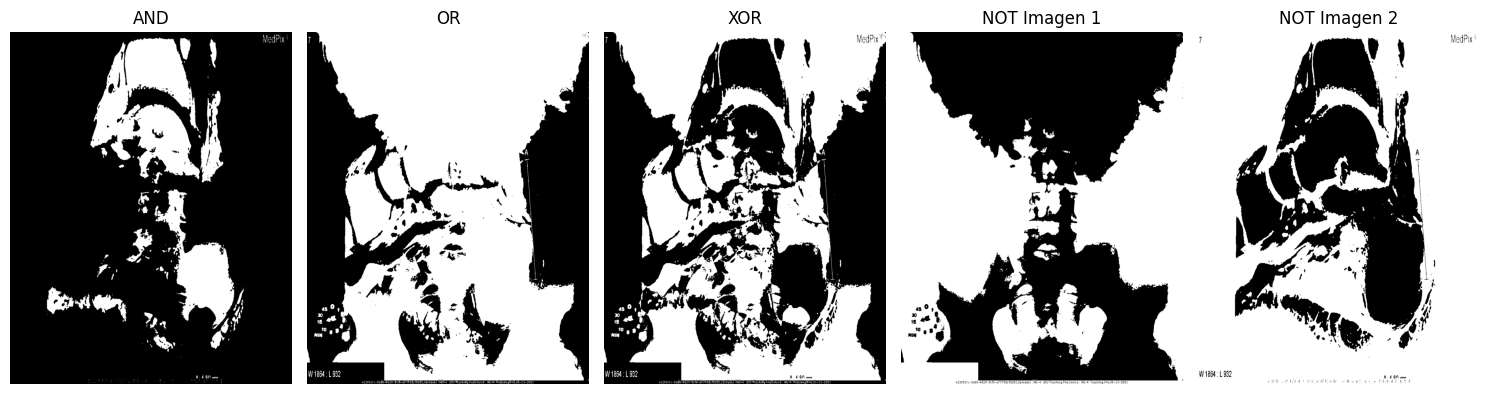

In [ ]:
# Procesamiento de Imágenes Médicas: Operaciones Aritméticas y Lógicas
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Paso 1: Subir imágenes
uploaded = files.upload()

# Paso 2: Cargar imágenes en escala de grises
# Updated filenames to match the uploaded file names from the 'uploaded' dictionary
img1 = cv2.imread('imagen1.jpg', cv2.IMREAD_GRAYSCALE)  # MRI
img2 = cv2.imread('Imagen2.jpg', cv2.IMREAD_GRAYSCALE)  # Radiografía - Note the capital 'I'

# Verificar carga
if img1 is None or img2 is None:
    raise ValueError("Verifica que los nombres de archivo sean correctos y que estén subidos.")

# Redimensionar si es necesario
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Mostrar originales
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img1, cmap='gray'); plt.title('Imagen 1 - MRI')
plt.subplot(1,2,2); plt.imshow(img2, cmap='gray'); plt.title('Imagen 2 - Radiografía')
plt.show()

# --------------------
# PARTE I: OPERACIONES ARITMÉTICAS
# --------------------

# 1. Suma de imágenes
suma_ponderada = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
suma_promedio = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(suma_ponderada, cmap='gray'); plt.title('Suma ponderada (70/30)')
plt.subplot(1,2,2); plt.imshow(suma_promedio, cmap='gray'); plt.title('Suma promedio (50/50)')
plt.show()

# 2. Resta de imágenes
resta = cv2.absdiff(img1, img2)

plt.imshow(resta, cmap='gray')
plt.title('Resta absoluta entre imágenes')
plt.axis('off')
plt.show()

# 3. Multiplicación por un factor (brillo)
factores = [0.5, 1.2, 1.8]

plt.figure(figsize=(12,6))
for i, f in enumerate(factores):
    mult1 = cv2.convertScaleAbs(img1, alpha=f)
    mult2 = cv2.convertScaleAbs(img2, alpha=f)
    plt.subplot(2,3,i+1); plt.imshow(mult1, cmap='gray'); plt.title(f'Imagen 1 × {f}')
    plt.subplot(2,3,i+4); plt.imshow(mult2, cmap='gray'); plt.title(f'Imagen 2 × {f}')
plt.tight_layout()
plt.show()

# 4. Multiplicación píxel a píxel
norm1 = img1 / 255.0
norm2 = img2 / 255.0
mult_pixel = np.uint8(norm1 * norm2 * 255)

plt.imshow(mult_pixel, cmap='gray')
plt.title('Multiplicación píxel a píxel')
plt.axis('off')
plt.show()

# --------------------
# PARTE II: OPERACIONES LÓGICAS
# --------------------

# 5. Convertir a binario (umbral simple)
_, bin1 = cv2.threshold(img1, 100, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(bin1, cmap='gray'); plt.title('Binaria 1')
plt.subplot(1,2,2); plt.imshow(bin2, cmap='gray'); plt.title('Binaria 2')
plt.show()

# Operaciones lógicas
and_img = cv2.bitwise_and(bin1, bin2)
or_img  = cv2.bitwise_or(bin1, bin2)
xor_img = cv2.bitwise_xor(bin1, bin2)
not1    = cv2.bitwise_not(bin1)
not2    = cv2.bitwise_not(bin2)

titles = ['AND', 'OR', 'XOR', 'NOT Imagen 1', 'NOT Imagen 2']
images = [and_img, or_img, xor_img, not1, not2]

plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(1,5,i+1); plt.imshow(images[i], cmap='gray'); plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
